# PCA(Principal Component Analysis)

https://datascienceschool.net/view-notebook/f10aad8a34a4489697933f77c5d58e3a/

## 붓꽃 데이터의 차원축소

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
iris = load_iris()
N = 10  # 앞의 10송이만 선택
X = iris.data[:N, :2]  # 꽃받침 길이와 꽃받침 폭만 선택

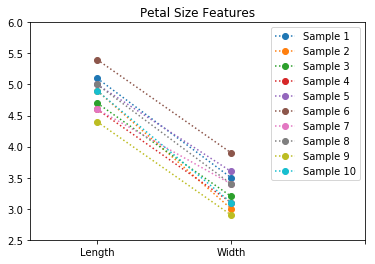

In [3]:
plt.plot(X.T, 'o:')
plt.xticks(range(4), ["Length", "Width"])
plt.xlim(-0.5, 2)
plt.ylim(2.5, 6)
plt.title("Petal Size Features")
plt.legend(["Sample {}".format(i + 1) for i in range(N)])
plt.show()

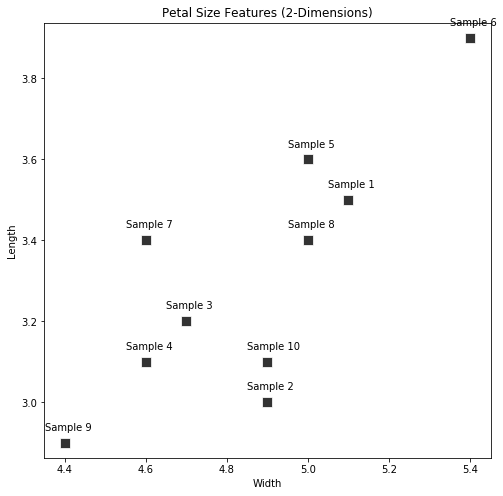

In [4]:
plt.figure(figsize=(8, 8))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
for i in range(N):
    ax.text(X[i, 0] - 0.05, X[i, 1] + 0.03, "Sample {}".format(i + 1))
plt.xlabel("Width")
plt.ylabel("Length")
plt.title("Petal Size Features (2-Dimensions)")
plt.axis("equal")
plt.show()

- 2차원 측정 데이터는 사실 "꽃의 크기"라는 근본적인 데이터가 두 개의 다른 형태로 표현된 것
- 측정되지는 않지만 기저에 숨어서 측정변수들을 결정짓는 데이터를 **잠재변수(latent variable)**라고 부른다.

- PCA의 가정: 잠재변수와 측정변수는 선형 관계
- $\longrightarrow$ $i$번째 표본의 측정변수 벡터 $x_i$의 각 원소를 선형조합($w$)하면 그 뒤에 숨은 $i$번째 표본의 잠재변수 $u_i$의 값을 계산할 수 있다.

$$
u_i=w^Tx_i
$$

- 붓꽃 데이터 예시: $
u_i = w_1 x_{i,1} + w_2 x_{i,2}
$

## 사이킷런의 PCA 기능

사이킷런의 decomposition 서브패키지는 PCA 분석을 위한 PCA 클래스를 제공한다. 사용법은 다음과 같다.

- 입력 인수:
  + n_components : 정수
- 메서드:
  + fit_transform() : 특징행렬을 낮은 차원의 근사행렬로 변환
  + inverse_transform() : 변환된 근사행렬을 원래의 차원으로 복귀
- 속성:
  + mean_ : 평균 벡터
  + components_ : 주성분 벡터

- X_low = 1차원 근사 데이터의 집합
- X2 = 다시 2차원으로 복귀한 근사 데이터의 집합

In [22]:
from sklearn.decomposition import PCA

pca_iris = PCA(n_components=1)
X_low = pca_iris.fit_transform(X)
X2 = pca_iris.inverse_transform(X_low)

In [23]:
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1]])

In [24]:
X_low

array([[ 0.30270263],
       [-0.1990931 ],
       [-0.18962889],
       [-0.33097106],
       [ 0.30743473],
       [ 0.79976625],
       [-0.11185966],
       [ 0.16136046],
       [-0.61365539],
       [-0.12605597]])

In [25]:
X2

array([[5.06676112, 3.53108532],
       [4.7240094 , 3.1645881 ],
       [4.73047393, 3.17150049],
       [4.63393012, 3.06826822],
       [5.06999338, 3.53454152],
       [5.40628057, 3.89412635],
       [4.78359423, 3.22830091],
       [4.97021731, 3.42785306],
       [4.44084251, 2.86180369],
       [4.77389743, 3.21793233]])

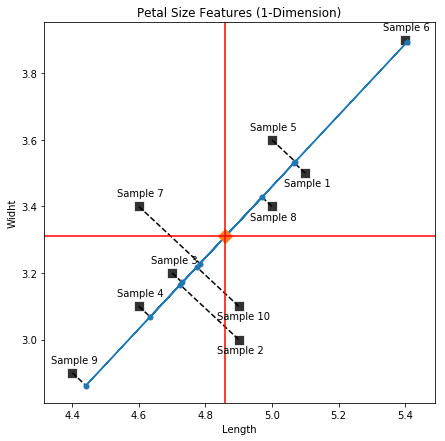

In [40]:
plt.figure(figsize=(7, 7))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")

# 관측 데이터
for i in range(N):
    d = 0.03 if X[i, 1] > X2[i, 1] else -0.04
    ax.text(X[i, 0] - 0.065, X[i, 1] + d, "Sample {}".format(i + 1))
    plt.plot([X[i, 0], X2[i, 0]], [X[i, 1], X2[i, 1]], "k--")

# 선형변환된 데이터의 관측 기저상 좌표
plt.plot(X2[:, 0], X2[:, 1], "o-", markersize=5)

plt.plot(X[:, 0].mean(), X[:, 1].mean(), markersize=10, marker="D")
plt.axvline(X[:, 0].mean(), c='r')
plt.axhline(X[:, 1].mean(), c='r')
plt.grid(False)
plt.xlabel("Length")
plt.ylabel("Widht")
plt.title("Petal Size Features (1-Dimension)")
plt.axis("equal")
plt.show()

### PCA 클래스의 속성

#### 원본 데이터셋의 평균

In [27]:
pca_iris.mean_

array([4.86, 3.31])

#### 차원 선형변환시의 주성분(PC) 벡터

In [42]:
pca_iris.components_.T

array([[0.68305029],
       [0.73037134]])

위 주성분 벡터는 **특이값 분해(SVD)** 시, 평균을 제거한 특징행렬의 첫 번째 오른쪽 특이벡터 또는 그 행렬의 분산행렬의 첫 번째(가장 큰 고윳값에 대응하는) 고유벡터에 해당한다.

In [41]:
X0 = X - X.mean(axis=0)
U, S, VT = np.linalg.svd(X0)
VT

array([[-0.68305029, -0.73037134],
       [-0.73037134,  0.68305029]])